## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/selected_gss_data.csv")
df.head()
print(df.columns)

Index(['family16', 'incom16', 'parsol', 'happy', 'attend', 'polviews'], dtype='object')


I chose 6 variables:
1. ***parsol*** - Compared to your parents when they were the age you are now, do you think your own standard of living now is much better, somewhat better, about the same, somewhat worse, or much worse than theirs was?
2. ***family16*** - Were you living with both your own mother and father around the time you were 16?
3. ***incom16*** - Thinking about the time when you were 16 years old, compared with American families in general then, would you say your family income was: far below average, below average, average, above average, or far above average?
4. ***happy*** - Taken all together, how would you say things are these days -- would you say that you are very happy, pretty happy, or not too happy?
5. ***attend*** - How often do you attend religious services?
6. ***polviews*** - We hear a lot of talk these days about liberals and conservatives. I'm going to show you a seven-point scale on which the political views that people might hold are arranged from extremely liberal--point 1--to extremely conservative--point 7. Where would you rank yourself?

The first 3 variables had to do with the individual's upbringing: what their financial status was, parental figures were like, and how their life compares now. I was curious to see if these variables in childhood upbringing had any relationship with an individual's happiness, religiosity, and political views in adult life. I anticipate that individuals who grew up wealthier and with both parental figures ended up being happier in their adult life. I am honestly curious to see if there are any patterns between religiosity and political views, because I think trends can go both ways.

In [4]:
# From family16, create new variable: # parental figures
df["parental_figures"] = df["family16"]
print(df["parental_figures"].value_counts())
twofigures_list = ["both own mother and father","mother and stepfather","father and stepmother"]
onefigures_list = ["mother only","father only"]
nofigures_list = ["other","other arrangement with relatives (e.g., aunt and uncle, grandparents)","some other female relative (no male head)","some other male relative (no female head)"]
df["parental_figures"] = df["parental_figures"].replace(twofigures_list, "mother and father figures (2)")
df["parental_figures"] = df["parental_figures"].replace(onefigures_list, "mother OR father figures (1)")
df["parental_figures"] = df["parental_figures"].replace(nofigures_list, "other or no figures (0)")
print("\n",df["parental_figures"].value_counts())

parental_figures
both own mother and father                                               50108
mother only                                                               9325
mother and stepfather                                                     3660
other                                                                     1782
father only                                                               1697
other arrangement with relatives (e.g., aunt and uncle, grandparents)     1594
father and stepmother                                                     1360
some other female relative (no male head)                                 1078
some other male relative (no female head)                                  231
Name: count, dtype: int64

 parental_figures
mother and father figures (2)    55128
mother OR father figures (1)     11022
other or no figures (0)           4685
Name: count, dtype: int64


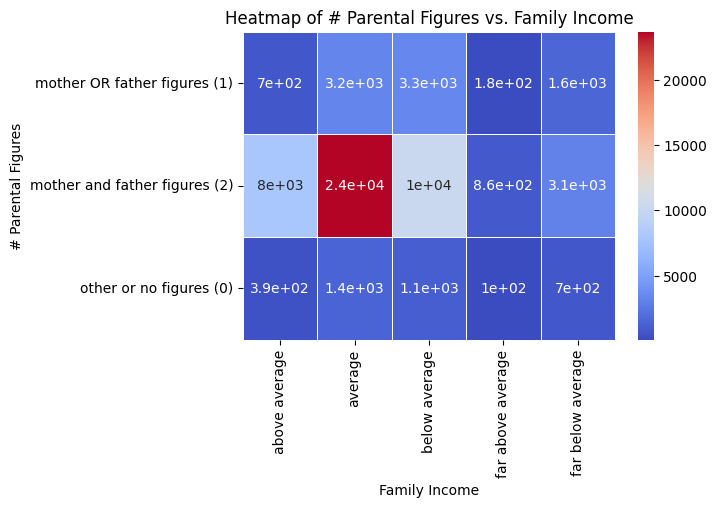

In [5]:
# See if there is a correlation between family income (incom16) and the number of parental figures

df["incom16"].value_counts()
df["incom16"] = df["incom16"].replace("lived in institution", pd.NA)
df["incom16"].value_counts()

heatmap1_data = df.groupby(["parental_figures", "incom16"]).size().unstack(fill_value=0)
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap1_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of # Parental Figures vs. Family Income")
plt.xlabel("Family Income")
plt.ylabel("# Parental Figures")
plt.show()

Most of the data seems to be concentrated to families with two parental figures and an average income, which makes sense.

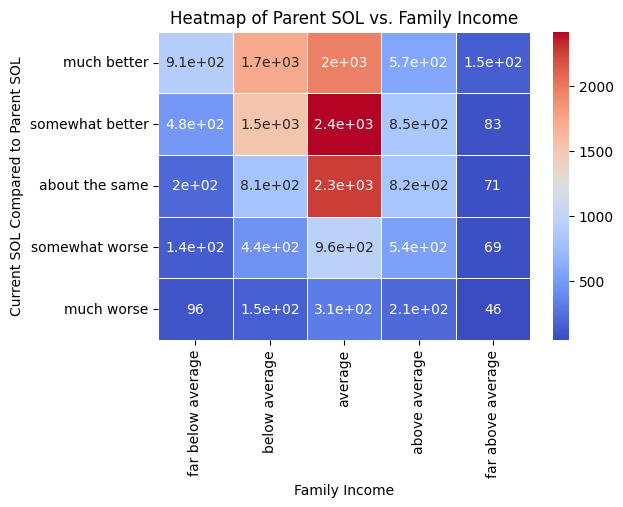

In [ ]:
# See if there is a relationship between family income (incom16) and parsol
heatmap2_data = df.groupby(["parsol", "incom16"]).size().unstack(fill_value=0)

#print("Row values:", heatmap2_data["parsol"].unique())
col_order = ['far below average', 'below average', 'average', 'above average', 'far above average']
row_order = ['much better', 'somewhat better', 'about the same', 'somewhat worse', 'much worse']
heatmap2_data = heatmap2_data.reindex(index=row_order, columns=col_order)

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap2_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Parent SOL vs. Family Income")
plt.xlabel("Family Income")
plt.ylabel("Current SOL Compared to Parent SOL")
plt.show()

Most people who grew up with below-average or average family incomes report having a similar or better standard of living in adulthood compared to childhood. This is consistent with real-world observations. People who grew up in households with significantly below-average family incomes often don't experience much improvement in their standard of living, which could be attributed to systemic barriers to escaping poverty.

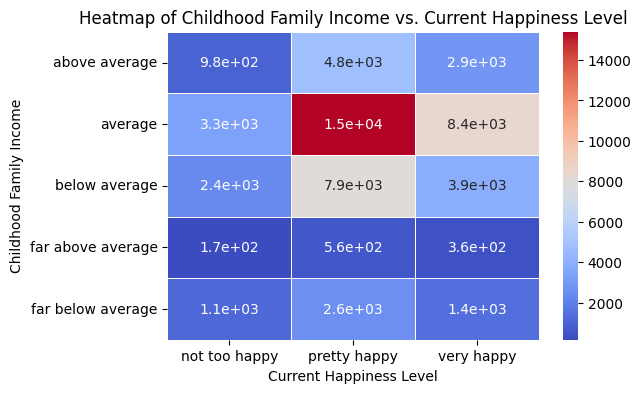

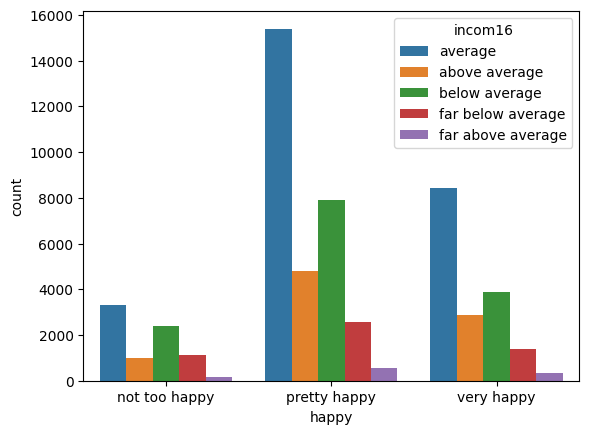

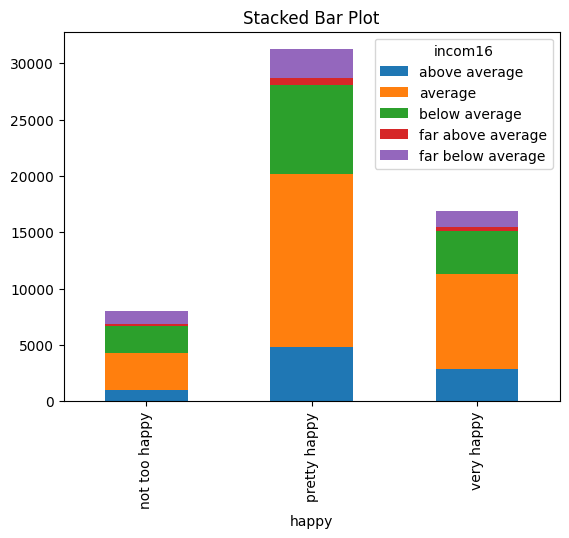

In [12]:
df["happy"].value_counts()
# See how current happiness relates to family income
heatmap3_data = df.groupby(["incom16", "happy"]).size().unstack(fill_value=0)
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap3_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Childhood Family Income vs. Current Happiness Level")
plt.xlabel("Current Happiness Level")
plt.ylabel("Childhood Family Income")
plt.show()

sns.countplot(x="happy", hue="incom16", data=df)

df.groupby(["happy", "incom16"]).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot')
plt.show()

All income levels are observed across all happiness categories. There appears to be at least a small positive correlation between income and happiness level, as there is a greater proportion of "below average" and smaller proportion of "above average" and "average" income levels in the "not too happy" category based off of the stacked bar plot.

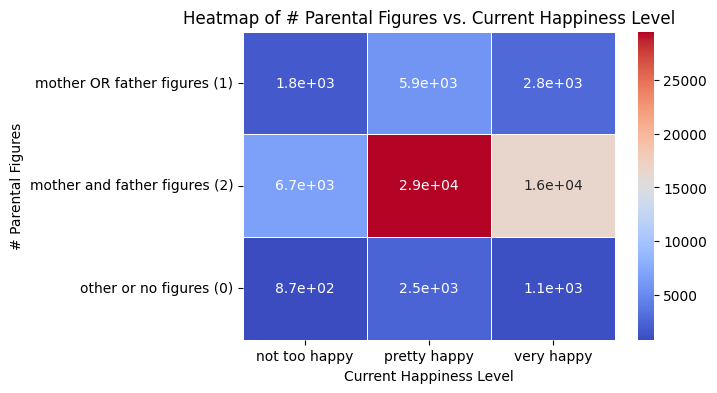

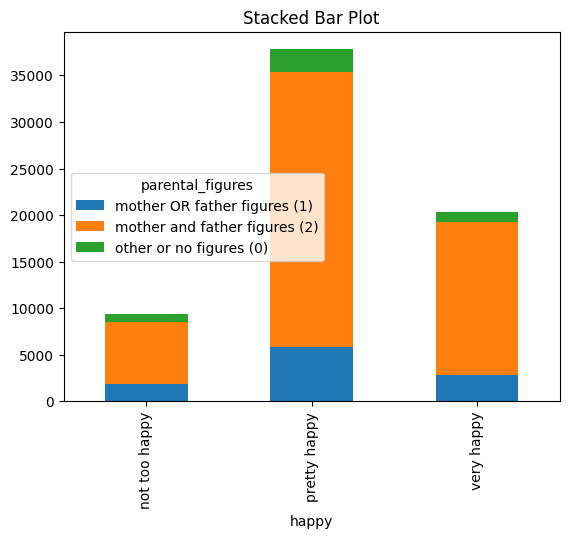

In [15]:
# See how current happiness relates to # of parental figures growing up
heatmap4_data = df.groupby(["parental_figures", "happy"]).size().unstack(fill_value=0)
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap4_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of # Parental Figures vs. Current Happiness Level")
plt.xlabel("Current Happiness Level")
plt.ylabel("# Parental Figures")

df.groupby(["happy", "parental_figures"]).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot')
plt.show()

Growing up with both parental figures appears to have a strong link to having a high happiness level. Based on the heatmap, most people who grew up with both parental figures were pretty happy or very happy.

In [ ]:
# See how # parental figures relates to religiosity

In [ ]:
# See how family income relates to religiosity

In [ ]:
# See how # parental figures relates to political views

Based off of the hypothesis that parents "pass down" their political views onto their children, I would expect no association between # parental figures and political views as different families have differing political views.

In [ ]:
# See how family income relates to political views